In [19]:
"""
Study variance of S&P 500 returns as a function of the time horizon. 
Naive expectation is variance grows linearly with time.
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Load data

In [3]:
data = pd.read_csv('SPX.csv', parse_dates = ['Date'], index_col = 0)

data['Pct_change'] = data['Adj Close'].pct_change()    # p2/p1 - 1
data['Log_change'] = np.log(1 + data['Pct_change'])    # Log(p2/p1)

print(data.head())

                 Open       High        Low      Close  Adj Close  Volume  \
Date                                                                        
1927-12-30  17.660000  17.660000  17.660000  17.660000  17.660000       0   
1928-01-03  17.760000  17.760000  17.760000  17.760000  17.760000       0   
1928-01-04  17.719999  17.719999  17.719999  17.719999  17.719999       0   
1928-01-05  17.549999  17.549999  17.549999  17.549999  17.549999       0   
1928-01-06  17.660000  17.660000  17.660000  17.660000  17.660000       0   

            Pct_change  Log_change  
Date                                
1927-12-30         NaN         NaN  
1928-01-03    0.005663    0.005647  
1928-01-04   -0.002252   -0.002255  
1928-01-05   -0.009594   -0.009640  
1928-01-06    0.006268    0.006248  


# Get variance as a function of time

In [9]:
def std_on_time(time_days):
    """
    Looking at data in periods of "time_days" business days, what is the standard deviation of the log returns?
    """
    sampled_data = data[::time_days].copy()
    
    sampled_data['Pct_change'] = sampled_data['Adj Close'].pct_change()    # p2/p1 - 1
    sampled_data['Log_change'] = np.log(1 + sampled_data['Pct_change'])    # Log(p2/p1)
    
    return sampled_data['Log_change'].var()

In [12]:
# find variance of log returns for 1, 2, ... 30 day long periods
time = np.arange(1,30)
var = [std_on_time(x) for x in time]

# Fit linear function, as predicted

In [18]:
fit_coef = np.polyfit(time, var, deg = 1)

In [23]:
def f(x, p):
    return x*p

fit_coef = curve_fit(f, time, var, p0 = 0.01)[0][0]

print(fit_coef)

0.0001448279207158393


# Plot results

Text(0, 0.5, 'Variance of log returns')

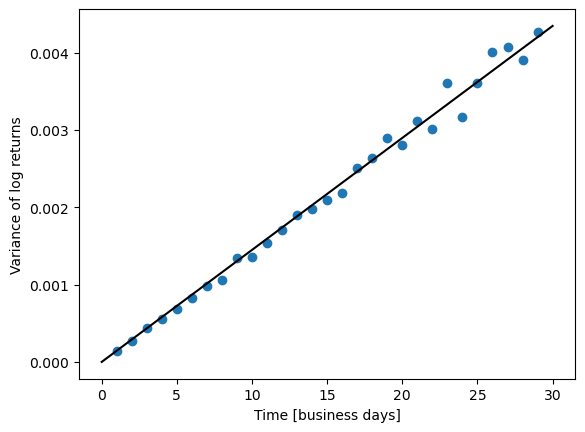

In [26]:
plt.scatter(time, var)
plt.plot([0,30], [0, 30*fit_coef], color = 'k')
plt.xlabel('Time [business days]')
plt.ylabel('Variance of log returns')

So the variance is really linearly increasing with time.